# Titanic Survival Prediction
### Introduction
This project aims to use Machine Learning Algorithms to find out the chances of survival for a passenger in the tragedy of titanic.
It uses various factors which might have affected the chances of survival of the passengers

### Objective
1. Build a machine learning model from a __"train"__ dataset which contains various passenger information like age, sex, fare, etc.
2. Find correlation between feautures and find out which feauture affected the survival the most.
3. Predict using multiple models and find out which one works best for an unseen **"test"** dataset.

### Dataset
The dataset contains the following columns:
<br>**PassengerID**
<br>**Survived:** If the passenger survived or not (0-> Did not survive, 1->Survived)
<br>**PClass:** Ticket Class (1=First, 2=Second, 3=Third)
<br>**Name:** Name of Passenger
<br>**Sex:** Gender (Male, Female)
<br>**Age**
<br>**SibSp:** No. of siblings/spouse aboard the Titanic
<br>**Parch:** No. of parents/children aboard the Titanic
<br>**Ticket:** Ticket Number of Passenger
<br>**Fare**
<br>**Cabin:** Cabin Number
<br>**Embarked:** Port of Embarkation (C-> Cherbourg, Q-> Queenstown, S-> Southampton)

## Elementary Data Analysis

### 1.Importing the libraries needed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


### 2.Reading the data
> ***df_train:*** The dataset on which we do Elemntary Data Analysis and Train out machine learning model.<br>
> ***df_test:*** The dataset on which we test the accuracy of our trained model.

In [2]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
205,1097,1,"Omont, Mr. Alfred Fernand",male,NaN,0,0,F.C. 12998,25.7417,NaN,C
398,1290,3,"Larsson-Rondberg, Mr. Edvard A",male,22.0,0,0,347065,7.7750,NaN,S
393,1285,2,"Gilbert, Mr. William",male,47.0,0,0,C.A. 30769,10.5000,NaN,S
324,1216,1,"Kreuchen, Miss. Emilie",female,39.0,0,0,24160,211.3375,NaN,S
133,1025,3,"Thomas, Mr. Charles P",male,NaN,1,0,2621,6.4375,NaN,C


### 3.Exploring the Dataset
Here we will be looking at the characteristics of the datasets and of the features in it.

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_train.shape

(891, 12)

___Training Dataset___
- 891 rows
- 12 columnms(features)
- Features: 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [9]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


___Testing Dataset___
- 418 rows
- 11 columnms(features)
- Features: 'PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'


### 3.Missing Values
Here we will check if there are missing values in any of the features.<br>
If present, we fill it with the median or the most frequent value of the respective feature.

___For Train Dataset___

In [11]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df_train['Age'].median()

28.0

In [13]:
df_train['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [14]:
df_train['Embarked'].mode()[0]

'S'

In [15]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

___For Test Dataset___

In [16]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [17]:
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())
df_test['Embarked'] = df_test['Embarked'].fillna(df_test['Embarked'].mode()[0])
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())

Here, we filled the missing `Age` and `Fare` values with the median value.<br>
And, for missing `Embarked` value, we used the mode value.

### 4.Dropping unnecessary Features
Feautures like `PassengerId`, `Name`, `Ticket`, `Cabin` are not useful for analysis or model building.<br>
Hence, we drop them

In [18]:
df_train=df_train.drop(["PassengerId", "Name", "Ticket", "Cabin"],axis=1)
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [19]:
df_test=df_test.drop(["PassengerId", "Name", "Ticket", "Cabin"],axis=1)
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,27.0,0,0,8.0500,S


### 5. Categorizing Data into Numerical and Categorical

In [20]:
num_col=df_train.select_dtypes(['int64','float64'])
num_col

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,28.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


So, Features with Numerical DataType: `Survived`, `Pclass`, `Age`, `SibSp`, `Parch`, `Fare`

For categorical features, we look at the number of unique values.

In [21]:
for col in df_train.columns:
    unique_values=df_train[col].value_counts()
    #print(unique_values)
    print(col, " has ", len(unique_values), " unique values")

Survived  has  2  unique values
Pclass  has  3  unique values
Sex  has  2  unique values
Age  has  88  unique values
SibSp  has  7  unique values
Parch  has  7  unique values
Fare  has  248  unique values
Embarked  has  3  unique values


So, we see the categorical features are:
- Survived
- Sex
- SibSp
- Parch
- Embarked

In [22]:
categ_col=df_train[['Survived', 'Sex', 'SibSp', 'Parch', 'Embarked']]
categ_col


,Survived,Sex,SibSp,Parch,Embarked
0,0,male,1,0,S
1,1,female,1,0,C
2,1,female,0,0,S
3,1,female,1,0,S
4,0,male,0,0,S
...,...,...,...,...,...
886,0,male,0,0,S
887,1,female,0,0,S
888,0,female,1,2,S
889,1,male,0,0,C


### 6.Correlation between Numerical Features

We find the correlation between the numerical features by plotting a correlation matrix between them.

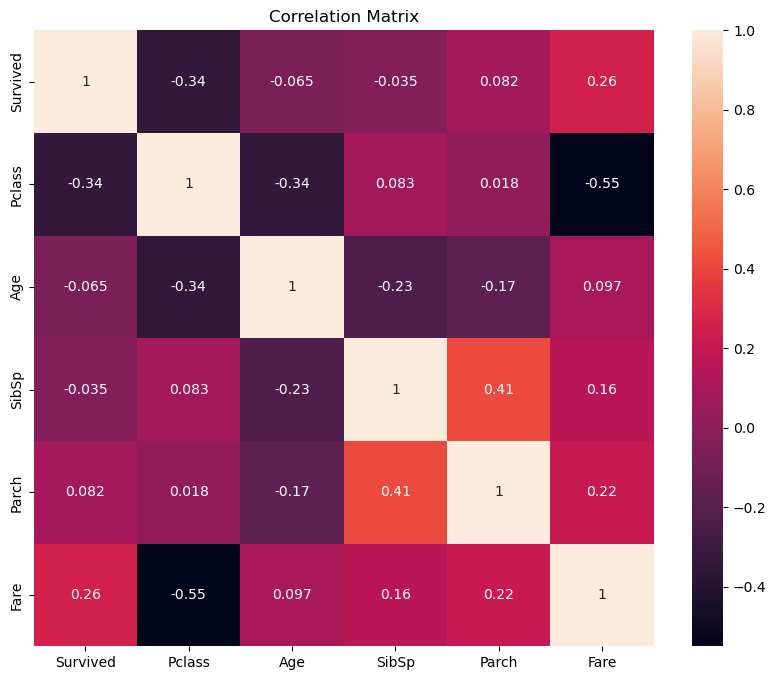

In [23]:
correlation_matrix = num_col.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

#### Findings
- Passengers who paid higher fare did not necessarily have a higher chance of survival
- Passengers who had higher number of family members had a higher chance of survival
- Age of passengers did not matter a lot in survival

### 7. Vizualizations of Numerical Features

Distribution of Survival By `Pclass`

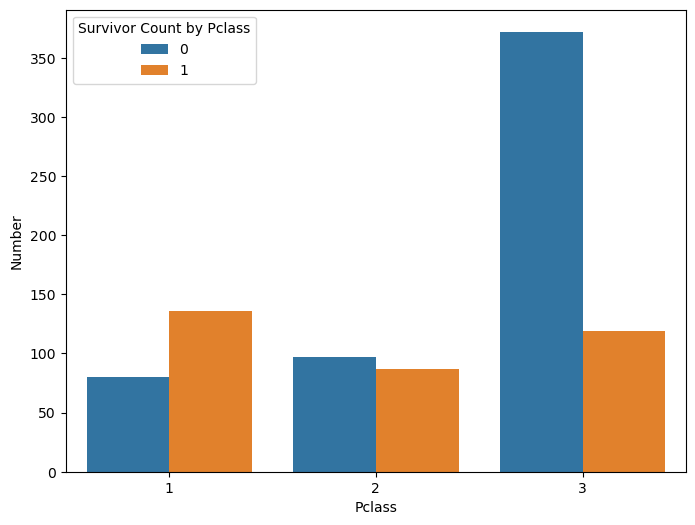

In [24]:
plt.figure(figsize=(8,6))
plt.xlabel("Pclass")
plt.ylabel("Number")
sns.countplot(x='Pclass', hue='Survived', data=num_col)
plt.legend(title="Survivor Count by Pclass")
plt.show()

Distribution of Survival By `SibSp`(# of siblings / spouses aboard the Titanic)

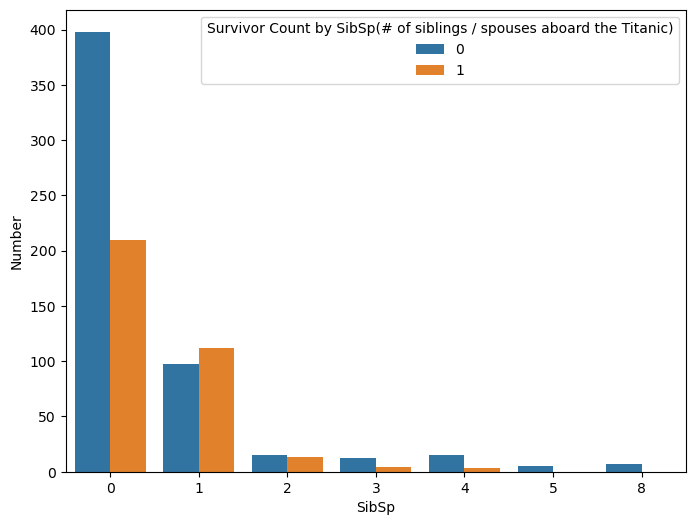

In [25]:
plt.figure(figsize=(8,6))
plt.xlabel("SibSp")
plt.ylabel("Number")
sns.countplot(x='SibSp', hue='Survived', data=num_col)
plt.legend(title="Survivor Count by SibSp(# of siblings / spouses aboard the Titanic)")
plt.show()

Distribution of Survival By `Parch` (# of parents / children aboard the Titanic)

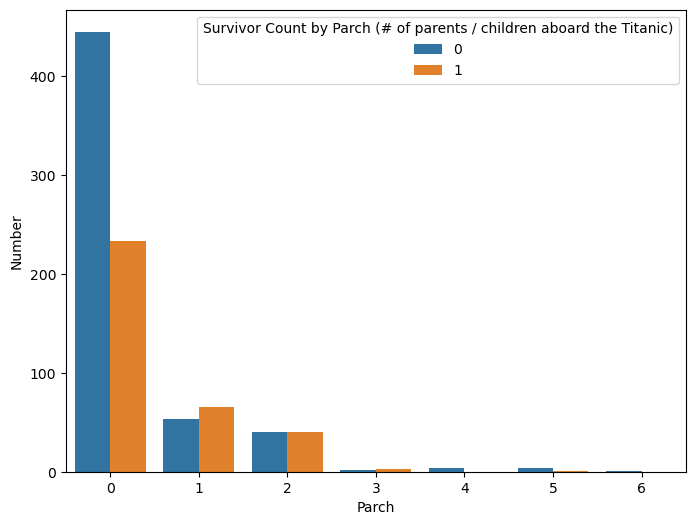

In [26]:
plt.figure(figsize=(8,6))
plt.xlabel("Parch")
plt.ylabel("Number")
sns.countplot(x='Parch', hue='Survived', data=num_col)
plt.legend(title="Survivor Count by Parch (# of parents / children aboard the Titanic)")
plt.show()

Frequency Distribution of Survivors by `Age`

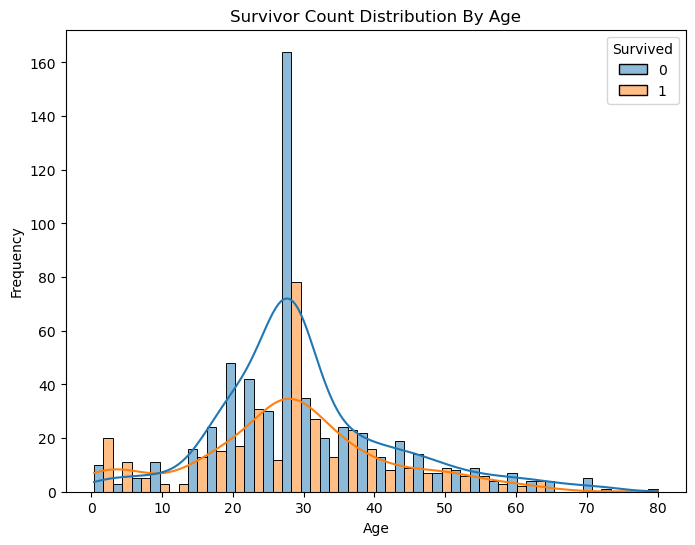

In [27]:
plt.figure(figsize=(8,6))
plt.title("Survivor Count Distribution By Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
sns.histplot(data=num_col, x='Age', hue='Survived',kde=True,multiple='dodge')
plt.show()

### 7. Vizualizations of Categorical Features

Distribution of Survival By `Sex`

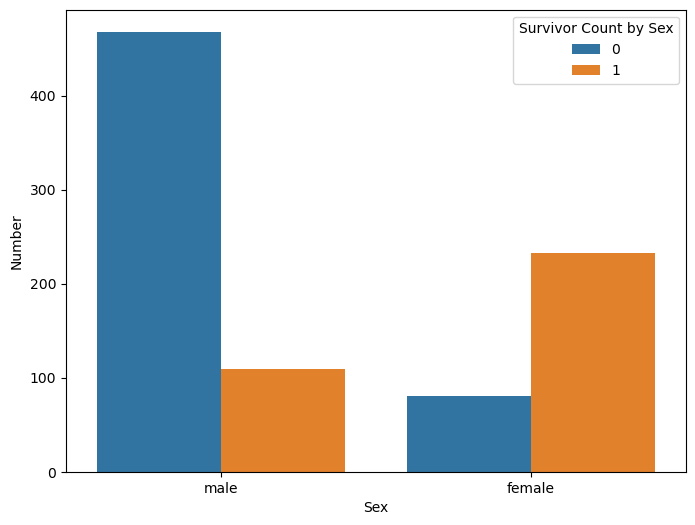

In [28]:
plt.figure(figsize=(8,6))
plt.xlabel("Sex")
plt.ylabel("Number")
sns.countplot(x='Sex', hue='Survived', data=categ_col)
plt.legend(title="Survivor Count by Sex")
plt.show()

Distribution of Survival By `Embarked` (Port of Embarkation)

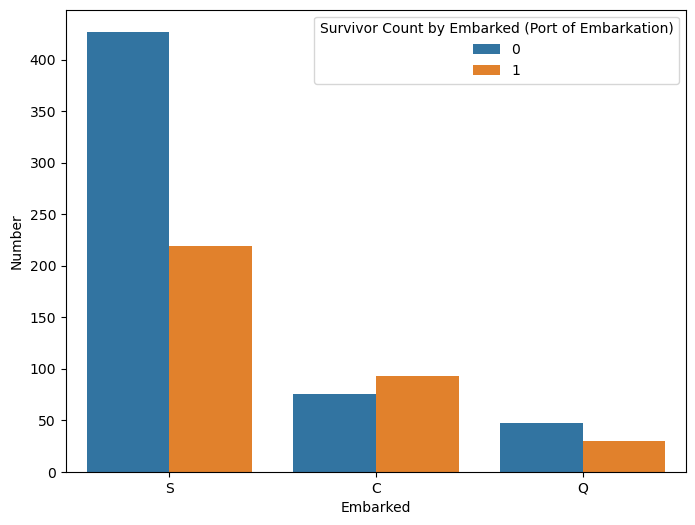

In [29]:
plt.figure(figsize=(8,6))
plt.xlabel("Embarked")
plt.ylabel("Number")
sns.countplot(x='Embarked', hue='Survived', data=categ_col)
plt.legend(title="Survivor Count by Embarked (Port of Embarkation)")
plt.show()

## Data Preprocessing

### 1.Encoding
We encode categorical columns like `Sex` and `Embarked` into numerical values using `.map()` so that the models can handle them.<br>
We do this for both the train and test datasets.

In [30]:
df_train['Sex']=df_train['Sex'].map({'male':0, 'female':1})
df_test['Sex']=df_test['Sex'].map({'male':0, 'female':1})

df_train['Embarked']=df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked']=df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [31]:
df_train.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
707,1,1,0,42.0,0,0,26.2875,2
20,0,2,0,35.0,0,0,26.0000,2
674,0,2,0,28.0,0,0,0.0000,2
672,0,2,0,70.0,0,0,10.5000,2
853,1,1,1,16.0,0,1,39.4000,2


## 2. Normalization
We normalize the features `Age` and `Fare`.

In [32]:
scaler=MinMaxScaler()
df_train[['Age']]=scaler.fit_transform(df_train[['Age']])

In [33]:
df_train[['Fare']]=scaler.fit_transform(df_train[['Fare']])

In [58]:
df_test[['Age']]=scaler.fit_transform(df_test[['Age']])
df_test[['Fare']]=scaler.fit_transform(df_test[['Fare']])

## 3.Data Splitting
We Split our data into target variable and the rest of the features upon which we will train our model.

In [34]:
y_train=df_train['Survived']
X_train=df_train.drop('Survived',axis=1)

In [64]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,0.271174,1,0,0.014151,2
1,1,1,0.472229,1,0,0.139136,0
2,3,1,0.321438,0,0,0.015469,2
3,1,1,0.434531,1,0,0.103644,2
4,3,0,0.434531,0,0,0.015713,2
...,...,...,...,...,...,...,...
886,2,0,0.334004,0,0,0.025374,2
887,1,1,0.233476,0,0,0.058556,2
888,3,1,0.346569,1,2,0.045771,2
889,1,0,0.321438,0,0,0.058556,0


## Modelling And Evaluation

### 1.Logistic Regression

>Create the Model

In [35]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR

LogisticRegression()

>Setting the parameters grid

In [36]:
param_grid={
    'C':[1.0,3.0,8.0,10.0,12.0,15.0],
    'penalty':[None,'l2','l1','elasticnet'],
    'solver':['lbfgs','liblinear','newton-cholesky']
              }

>Setting up GridSearchCV

In [37]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(LR, param_grid, cv=5)
grid_search

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 3.0, 8.0, 10.0, 12.0, 15.0],
                         'penalty': [None, 'l2', 'l1', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cholesky']})

>Fitting the model using GridSearchCV and finding the best parameters

In [38]:
grid_search.fit(X_train, y_train)

C:\Users\Kinjal Mitra\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Kinjal Mitra\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Kinjal Mitra\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Kinjal Mitra\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Kinjal Mitra\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warni

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 3.0, 8.0, 10.0, 12.0, 15.0],
                         'penalty': [None, 'l2', 'l1', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cholesky']})

In [39]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}


>Setting up the best model on the basis of the best parameters

In [40]:
best_LR = grid_search.best_estimator_
best_LR

LogisticRegression()

### 3.Cross-Validating the model 

The following demonstrates how the accuracy of the Logistic Regression model on the Training dataset by splitting the data, fitting a model and computing the score 5 consecutive times (with different splits each time):

In [42]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_LR, X_train, y_train, cv=5)
scores

array([0.79329609, 0.78089888, 0.78651685, 0.76966292, 0.8258427 ])

The mean score and the standard deviation are hence given by:

In [44]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.79 accuracy with a standard deviation of 0.02


>Now, we get predictions to further calculate other performance metrics

In [46]:
from sklearn.model_selection import cross_val_predict
DTC_predict = cross_val_predict(best_LR, X_train, y_train, cv=5)
DTC_predict

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,

In [47]:
from sklearn.metrics import classification_report
print(classification_report(DTC_predict, y_train))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       573
           1       0.69      0.75      0.72       318

    accuracy                           0.79       891
   macro avg       0.77      0.78      0.78       891
weighted avg       0.80      0.79      0.79       891



So, we can see the model has a accuracy of 79% for the training dataset

>Confusion Matrix

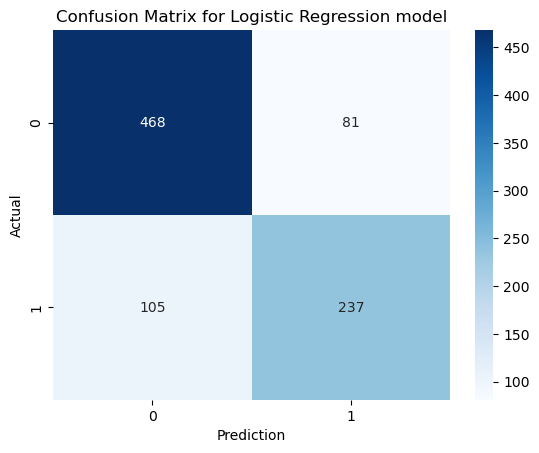

In [51]:
from sklearn.metrics import confusion_matrix
ConfusionMatrix = confusion_matrix(y_train, DTC_predict)
sns.heatmap(ConfusionMatrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression model')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

## Model testing with Test Dataset

In [59]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,0.452723,0,0,0.015282,1
1,3,1,0.617566,1,0,0.013663,2
2,2,0,0.815377,0,0,0.018909,1
3,3,0,0.353818,0,0,0.016908,2
4,3,1,0.287881,1,1,0.023984,2
...,...,...,...,...,...,...,...
413,3,0,0.353818,0,0,0.015713,2
414,1,1,0.512066,0,0,0.212559,0
415,3,0,0.505473,0,0,0.014151,2
416,3,0,0.353818,0,0,0.015713,2


In [60]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Pclass,418.0,2.265550,0.841838,1.0,1.000000,3.000000,3.000000,3.0
Sex,418.0,0.363636,0.481622,0.0,0.000000,0.000000,1.000000,1.0
Age,418.0,0.388096,0.167530,0.0,0.301068,0.353818,0.469207,1.0
SibSp,418.0,0.447368,0.896760,0.0,0.000000,0.000000,1.000000,8.0
Parch,418.0,0.392344,0.981429,0.0,0.000000,0.000000,0.000000,9.0
Fare,418.0,0.069441,0.109012,0.0,0.015412,0.028213,0.061429,1.0
Embarked,418.0,1.401914,0.854496,0.0,1.000000,2.000000,2.000000,2.0


As we can see, the test dataset has all the columnns.<br> So, we can now use our Logistic Regression Model to get our predictions 

In [67]:
predictions=best_LR.predict(df_test)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

The predictions for the Test Dataset is present in the `gender_submission.csv` file.<br>
So, we read that file and then find out accuracy for the test dataset.

In [68]:
df_gender_submission=pd.read_csv("gender_submission.csv")

In [69]:
df_gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Here, we drop the `PassengerId` feature as it is only used to indicate the passenger.

In [70]:
y_test=df_gender_submission.drop("PassengerId", axis=1)
y_test

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


Now, we find out the performance metrics.

In [71]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       262
           1       0.95      0.92      0.94       156

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



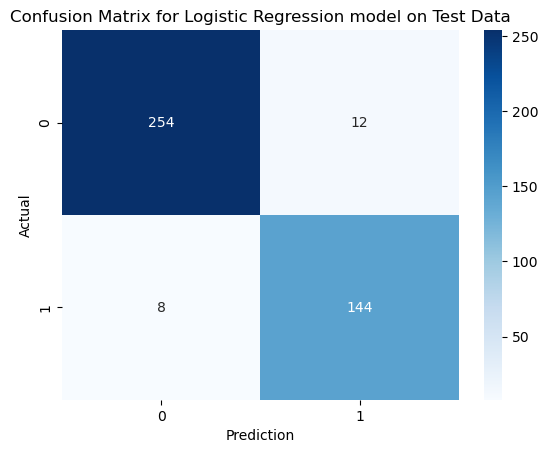

In [72]:
from sklearn.metrics import confusion_matrix
ConfusionMatrix = confusion_matrix(y_test, predictions)
sns.heatmap(ConfusionMatrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression model on Test Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

So, we can see the Logistic Regression Model performed very well with an accuracy of 95% on the test dataset.

Hence, we save our predictions with the given test dataset in a new file, namely - `result.csv`

In [74]:
df_gender_submission['Survival Prediction']=predictions
df_gender_submission

,PassengerId,Survived,Survival Prediction
0,892,0,0
1,893,1,0
2,894,0,0
3,895,0,0
4,896,1,1
...,...,...,...
413,1305,0,0
414,1306,1,1
415,1307,0,0
416,1308,0,0


In [76]:
df_gender_submission.to_csv('result.csv', index=False)

***

### Authors
<a href="https://www.linkedin.com/in/kinjal-mitra-992147325/" target="_blank">Kinjal Mitra</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | 
| ----------------- | ------- | ---------- | 
| 2024-12-04        | 1.0     | Kinjal Mitra |